In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Importing the dataset
df = pd.read_csv('titanic.csv')

In [6]:
df.shape

(891, 12)

In [8]:
df.head(5)

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [9]:
df.tail()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
886,887,"Montvila, Rev. Juozas",2,male,27.0,0,0,211536,13.00,NaN,S,0
887,888,"Graham, Miss. Margaret Edith",1,female,19.0,0,0,112053,30.00,B42,S,1
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",3,female,NaN,1,2,W./C. 6607,23.45,NaN,S,0
889,890,"Behr, Mr. Karl Howell",1,male,26.0,0,0,111369,30.00,C148,C,1
890,891,"Dooley, Mr. Patrick",3,male,32.0,0,0,370376,7.75,NaN,Q,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Name         891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
null_var = df.isnull().sum()/df.shape[0] * 100

<AxesSubplot: >

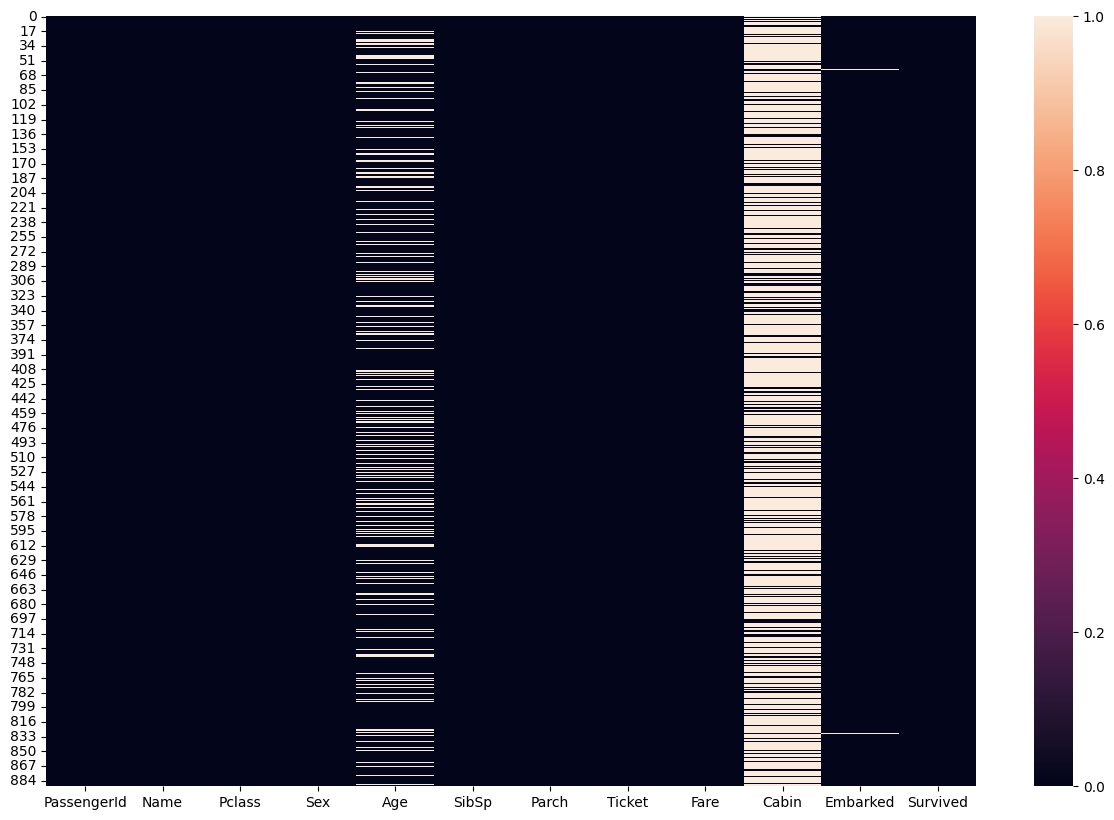

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull())

In [16]:
null_val = null_var[null_var > 19].keys()
null_val

Index(['Age', 'Cabin'], dtype='object')

In [17]:
df2 = df.drop(columns=null_val)

<AxesSubplot: >

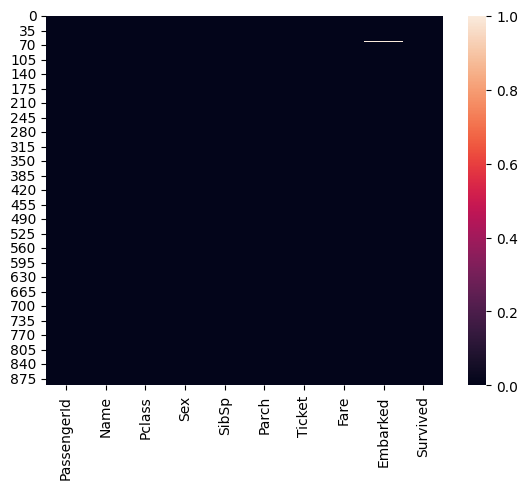

In [18]:
sns.heatmap(df2.isnull())

In [23]:
df3 = df2.dropna()

<AxesSubplot: >

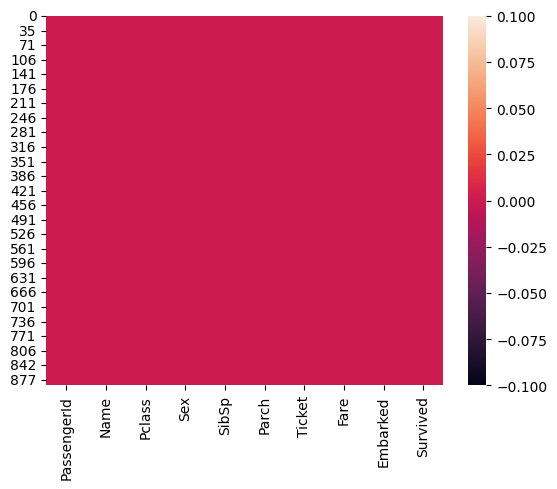

In [24]:
sns.heatmap(df3.isnull())

In [34]:
numerical_columns = df3.select_dtypes(include=['int32', 'int64', 'float32', 'float64']).columns
numerical_columns

Index(['PassengerId', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Survived'], dtype='object')

In [35]:
num_col = ['Pclass', 'SibSp', 'Parch', 'Fare', 'Survived']

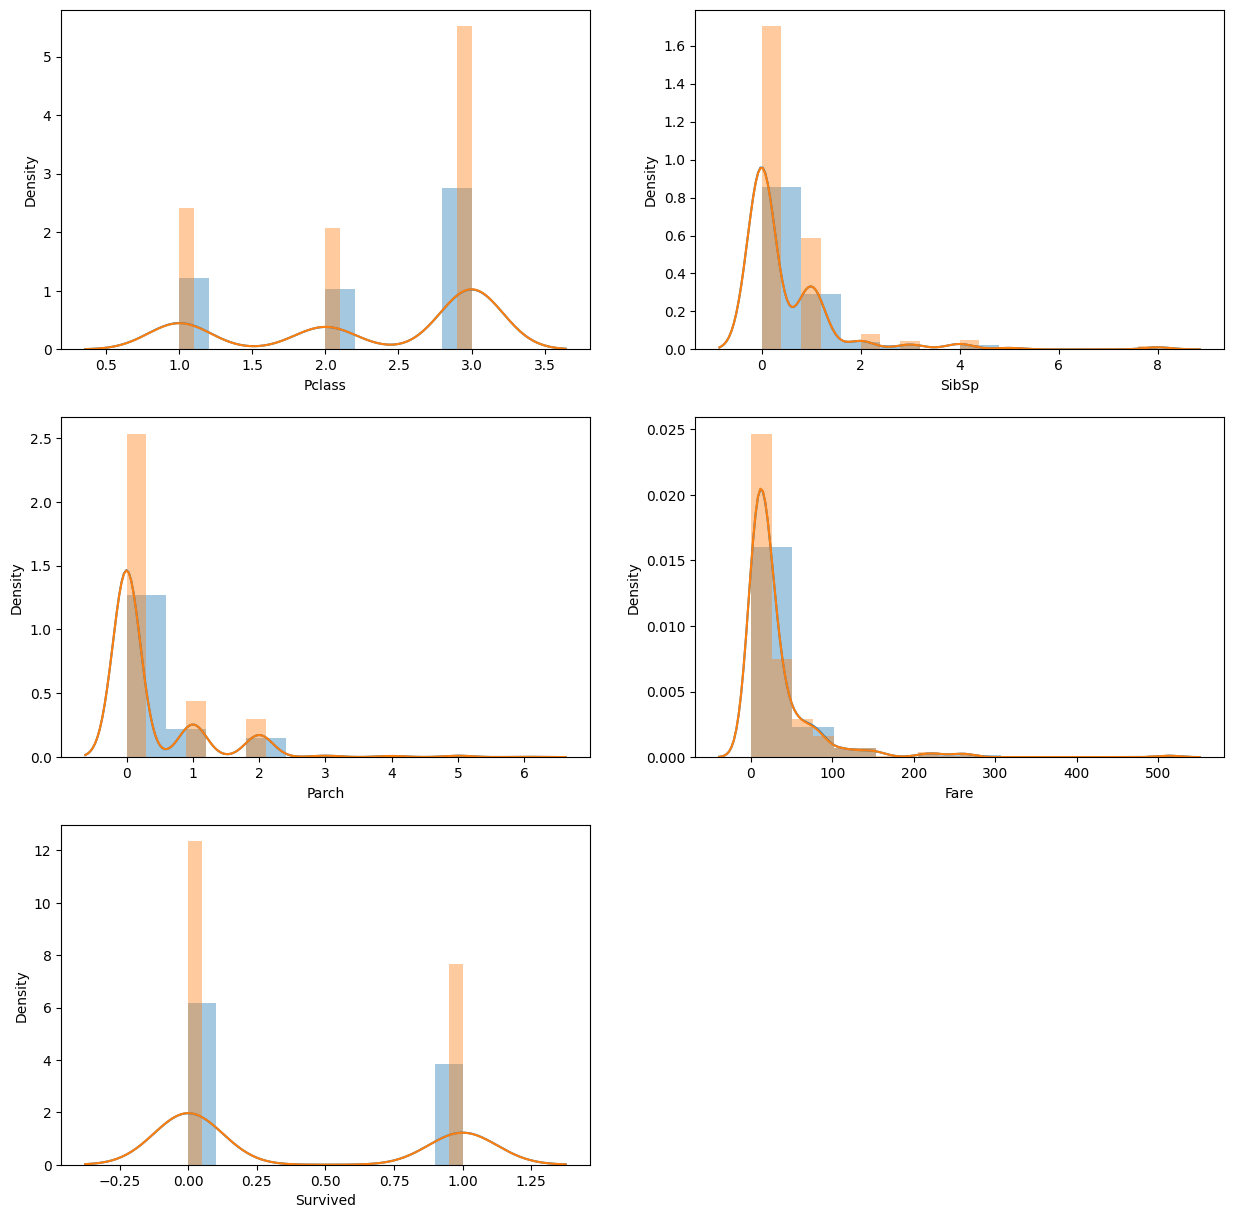

In [38]:
plt.figure(figsize=(15,15))
for i, val in enumerate(num_col):
    plt.subplot(3, 2, i+1)
    sns.distplot(df[val], bins=10)
    sns.distplot(df3[val], bins=20)
plt.show()

In [40]:
categorical_columns = df3.select_dtypes(include=['object', 'category']).columns
categorical_columns

Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')

In [46]:
def concat_val(val):
    return pd.concat([df[val].value_counts()/df.shape[0] * 100, df3[val].value_counts()/df3.shape[0] * 100],
         keys=[val+'_org', val+'_clean'], axis=1)

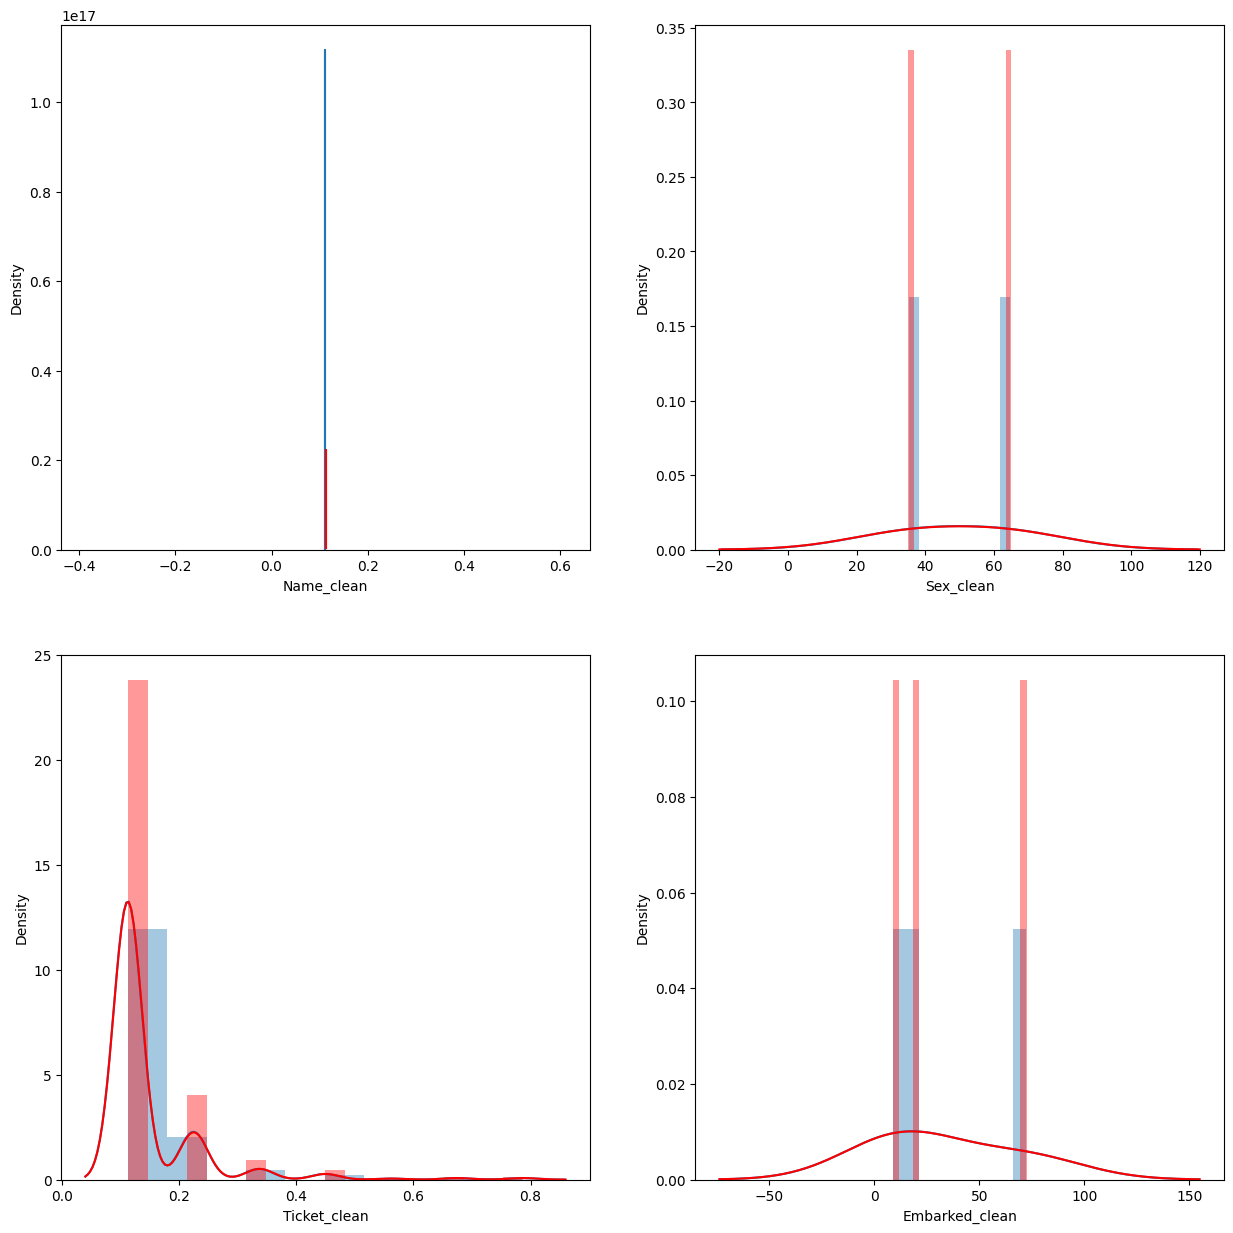

In [55]:
plt.figure(figsize=(15,15))
for i, val in enumerate(categorical_columns):
    dataframe = concat_val(val)
    plt.subplot(2, 2, i+1)
    sns.distplot(dataframe[val+'_org'], bins=10)
    sns.distplot(dataframe[val+'_clean'], bins=20, color="red")
plt.show()

In [56]:
df3.shape

(889, 10)

In [57]:
df.shape

(891, 12)

In [59]:
df.isnull().sum().sum()

866